In [58]:
import glob
import pandas as pd
import numpy as np
#그래픽
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)
#전처리
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
#데이터분리
from sklearn.model_selection import train_test_split
#모델구축
from sklearn.tree import DecisionTreeClassifier
#모델검정
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,make_scorer
from sklearn.metrics import roc_curve
#최적화
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve, validation_curve
#하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV


In [59]:
find_file = glob.glob("*Bank.csv*")
find_file

['UniversalBank.csv']

In [60]:
# export dataset
bank_df = pd.read_csv(find_file[0])
bank_df.head()


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [61]:
print(f'bank_df.shape: {bank_df.shape}')
print(f'bank_df.keys: {bank_df.keys()}')

bank_df.shape: (5000, 14)
bank_df.keys: Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')


In [74]:
#데이터 분리
split_list = ['ID','ZIPCode','PersonalLoan']
X = bank_df.drop(split_list,axis=1)
print(f'X.shape: {X.shape}')
X.head(3)


X.shape: (5000, 11)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0


In [63]:
y = bank_df['PersonalLoan']
print(f'y_np.bincount: {np.bincount(y)}') #3 [no yes] [0 1]의 분포를 보여줌 
print(f'y.shape: {y.shape}')

y_np.bincount: [4520  480]
y.shape: (5000,)


In [73]:
# 데이터 전처리
# 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움
# X['Education'] = X['Education'].replace([1,2,3],['Under','Grad','Prof'])
# print(X.head(10))

   Age  Experience  Income  Family  CCAvg Education  Mortgage  \
0   25           1      49       4    1.6     Under         0   
1   45          19      34       3    1.5     Under         0   
2   39          15      11       1    1.0     Under         0   
3   35           9     100       1    2.7      Grad         0   
4   35           8      45       4    1.0      Grad         0   
5   37          13      29       4    0.4      Grad       155   
6   53          27      72       2    1.5      Grad         0   
7   50          24      22       1    0.3      Prof         0   
8   35          10      81       3    0.6      Grad       104   
9   34           9     180       1    8.9      Prof         0   

   SecuritiesAccount  CDAccount  Online  CreditCard  
0                  1          0       0           0  
1                  1          0       0           0  
2                  0          0       0           0  
3                  0          0       0           0  
4             

In [75]:
# train/test data split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [76]:
X_test.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
805,55,29,132,3,5.9,2,307,0,0,0,0
2740,54,29,48,2,2.1,3,142,0,0,1,0
4036,46,21,13,2,0.7,3,0,0,0,1,0
870,43,19,35,3,0.5,1,0,0,0,1,0
4373,30,6,139,1,4.3,1,0,0,0,1,0


In [77]:
# model construct
# 하이퍼 파라미터 튜닝을 위해 max_depth를 None값으로 둔다
tree = DecisionTreeClassifier(criterion='gini', max_depth = None, random_state=1) 
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [80]:
# model validation

y_pred = tree.predict(X_test)
y_pred


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
c_m = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['True[0]','True[1]'], columns=['Predict[0]','Predict[1]'])
c_m

,Predict[0],Predict[1]
True[0],1344,12
True[1],16,128


In [86]:
print(f'Classification Report \n{classification_report(y_test,y_pred)}')

Classification Report 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.89      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



<function matplotlib.pyplot.show(close=None, block=None)>

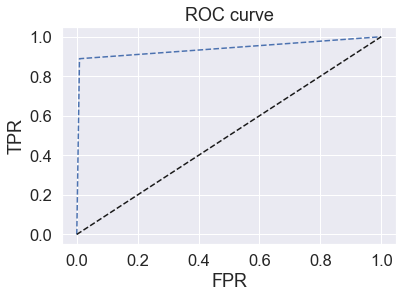

In [90]:
fpr,tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
fpr,tpr,thresholds
plt.plot(fpr,tpr, '--', label='DecisionTree')
plt.plot([0,1],[0,1],'k--',label='random guess')
plt.plot([fpr],[tpr],'r-',ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show

In [91]:
# DecisionTree Graph
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=9844a149e4f0d73f0fad7fed9aa05a088015c4212df7557aab3cbcdfc1240a50
  Stored in directory: c:\users\amj41\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


You should consider upgrading via the 'c:\users\amj41\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
from py